## Analysis of XLM_512

In [136]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json,os,pdb
import tqdm
import warnings
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier

In [137]:
df_clean=pd.read_csv('clean_df.csv')
df=df_clean[df_clean['symbol_id']=='XLM_512']
df.shape

(689, 18)

In [138]:
df.describe()#close price is 0.26 on average

,close,volume,marketcap,month,day,weekday,day of week,price change,volume change,tomorrow change,SPY,VIX,10Y Treasury,Gold,Oil,EUR_USD
count,689.000000,6.890000e+02,6.890000e+02,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,0.258325,7.510124e+08,6.098819e+09,6.420900,15.625544,2.995646,0.709724,0.003134,0.063413,0.003146,409.180744,22.627794,1.872089,1815.584470,77.622627,1.135328
std,0.136653,8.970875e+08,3.110540e+09,3.328423,8.864893,2.018442,0.454219,0.075267,0.429156,0.075260,35.962092,5.077914,0.775622,71.197097,20.773782,0.068814
min,0.068613,6.502036e+07,1.422532e+09,1.000000,1.000000,0.000000,0.000000,-0.366735,-0.578672,-0.366735,314.251007,15.010000,0.645000,1623.300049,35.790001,0.959619
25%,0.129197,2.085849e+08,3.195645e+09,4.000000,8.000000,1.000000,0.000000,-0.031315,-0.194290,-0.031315,383.554443,18.309999,1.345000,1771.099976,63.830002,1.086484
50%,0.249918,4.359857e+08,5.836270e+09,6.000000,16.000000,3.000000,1.000000,-0.000485,-0.016557,-0.000485,411.977692,21.840000,1.605000,1810.199951,75.029999,1.159152
75%,0.352312,8.610398e+08,8.346638e+09,9.000000,23.000000,5.000000,1.000000,0.029386,0.183366,0.029386,436.573761,26.379999,2.681000,1865.900024,92.349998,1.187366
max,0.718957,6.691866e+09,1.659982e+10,12.000000,31.000000,6.000000,1.000000,1.129138,3.075317,1.129138,472.242310,38.020000,3.964000,2040.099976,123.699997,1.230027


In [139]:
df.index=df['time_close']
df

,symbol_id,time_close,close,volume,marketcap,month,day,weekday,day of week,price change,volume change,tomorrow change,SPY,VIX,10Y Treasury,Gold,Oil,EUR_USD
time_close,,,,,,,,,,,,,,,,,,
2020-09-24,XLM_512,2020-09-24,0.068613,1.257038e+08,1.422532e+09,9,24,3,1,-0.041776,0.130112,0.023188,314.251007,28.510000,0.666,1868.300049,40.310001,1.165854
2020-09-25,XLM_512,2020-09-25,0.070204,1.449687e+08,1.455307e+09,9,25,4,1,0.023188,0.153256,0.066801,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
2020-09-26,XLM_512,2020-09-26,0.074894,1.755840e+08,1.552898e+09,9,26,5,0,0.066801,0.211185,-0.010805,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
2020-09-27,XLM_512,2020-09-27,0.074085,1.236827e+08,1.536119e+09,9,27,6,0,-0.010805,-0.295592,-0.000851,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
2020-09-28,XLM_512,2020-09-28,0.074022,1.230299e+08,1.534811e+09,9,28,0,1,-0.000851,-0.005278,-0.003863,324.635376,26.190001,0.663,1872.800049,40.599998,1.163535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,XLM_512,2022-09-29,0.108473,1.559084e+08,2.763125e+09,9,29,3,1,-0.014612,-0.060907,0.053767,362.790009,31.840000,3.747,1658.500000,81.230003,0.970817
2022-09-30,XLM_512,2022-09-30,0.114305,2.215093e+08,2.912604e+09,9,30,4,1,0.053767,0.420765,0.001370,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956
2022-10-01,XLM_512,2022-10-01,0.114461,1.889137e+08,2.916708e+09,10,1,5,0,0.001370,-0.147152,0.058336,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956


In [140]:
df.isnull().sum()

symbol_id          0
time_close         0
close              0
volume             0
marketcap          0
month              0
day                0
weekday            0
day of week        0
price change       0
volume change      0
tomorrow change    0
SPY                0
VIX                0
10Y Treasury       0
Gold               0
Oil                0
EUR_USD            0
dtype: int64

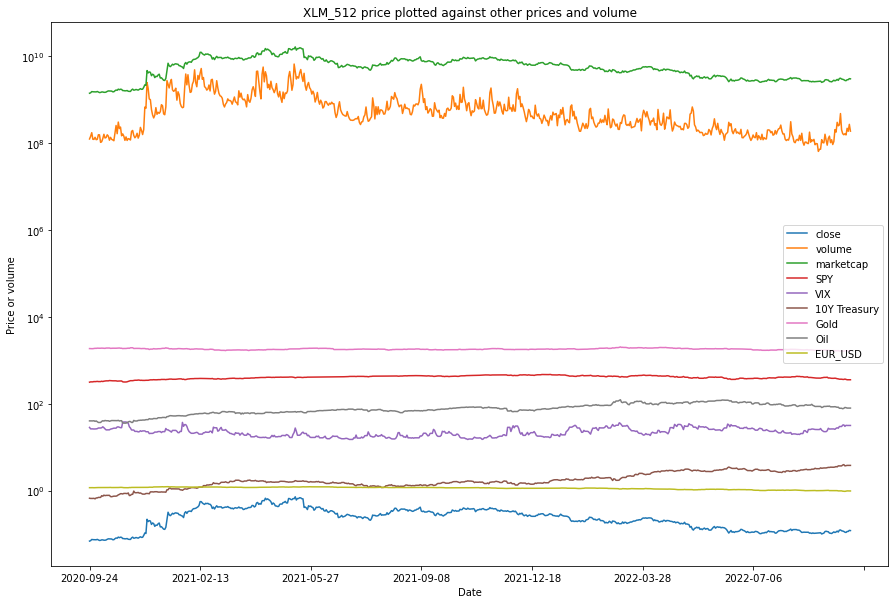

In [141]:
df.plot(y=['close', 'volume', 'marketcap',
                     'SPY', 'VIX', '10Y Treasury', 'Gold', 'Oil','EUR_USD'], logy=True,figsize=(15, 10))
plt.xlabel('Date')
plt.ylabel('Price or volume')
plt.title('XLM_512 price plotted against other prices and volume')
plt.show()


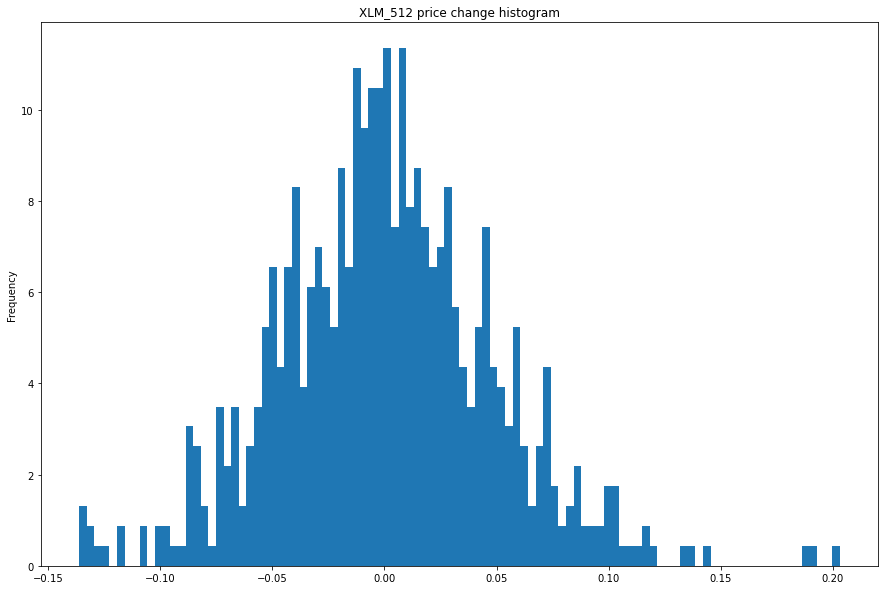

Skewness: 5.614168
Kurtosis: 78.103098


In [142]:
    plt.figure(figsize=(15,10))
    q3, q1 = df['tomorrow change'].quantile([0.99, 0.01])
    df.loc[(df['tomorrow change'] < q3) & (df['tomorrow change'] > q1)]['tomorrow change'].plot.hist(density=1,bins=100)
    plt.title('XLM_512 price change histogram')
    plt.show()
    print("Skewness: %f" % df['tomorrow change'].skew())
    print("Kurtosis: %f" % df['tomorrow change'].kurt())#sharp peak

          close     month
close  1.000000 -0.221299
month -0.221299  1.000000
          close       day
close  1.000000 -0.046867
day   -0.046867  1.000000
            close   weekday
close    1.000000 -0.009681
weekday -0.009681  1.000000
                close  day of week
close        1.000000     0.009692
day of week  0.009692     1.000000
          close       SPY
close  1.000000  0.318118
SPY    0.318118  1.000000
          close       VIX
close  1.000000 -0.571365
VIX   -0.571365  1.000000
                 close  10Y Treasury
close         1.000000     -0.399018
10Y Treasury -0.399018      1.000000
          close      Gold
close  1.000000 -0.159603
Gold  -0.159603  1.000000
          close       Oil
close  1.000000 -0.307637
Oil   -0.307637  1.000000
            close   EUR_USD
close    1.000000  0.639724
EUR_USD  0.639724  1.000000


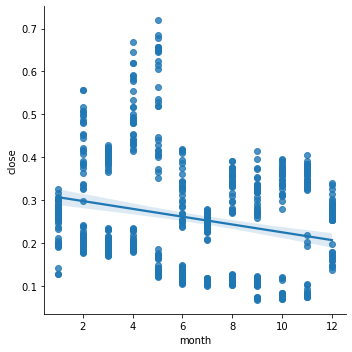

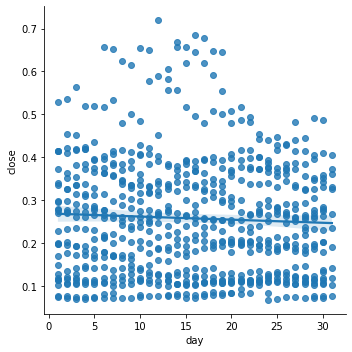

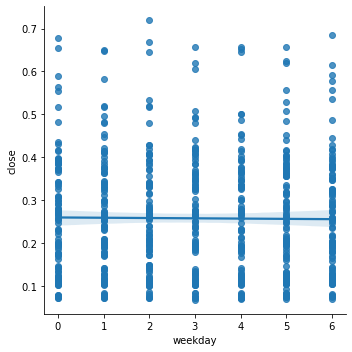

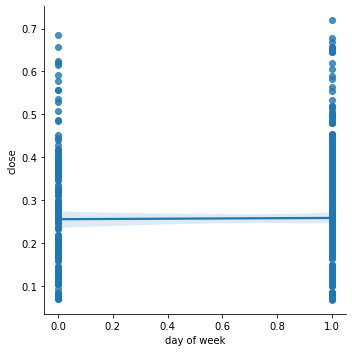

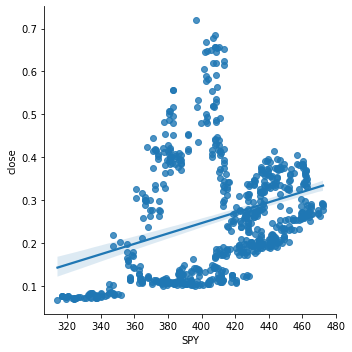

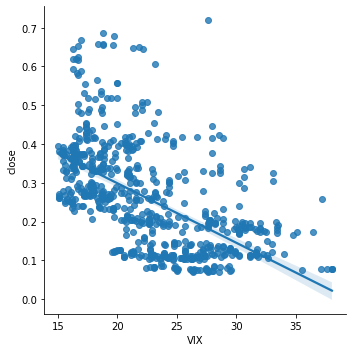

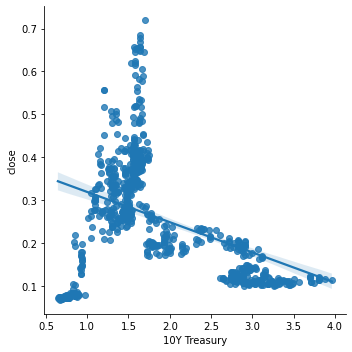

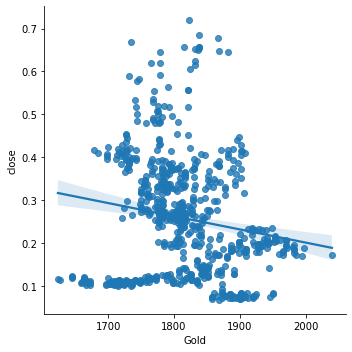

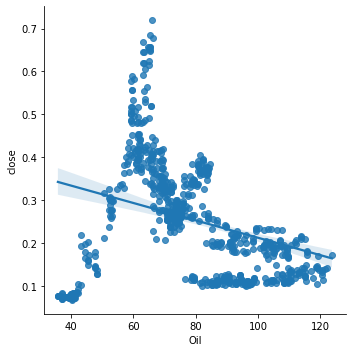

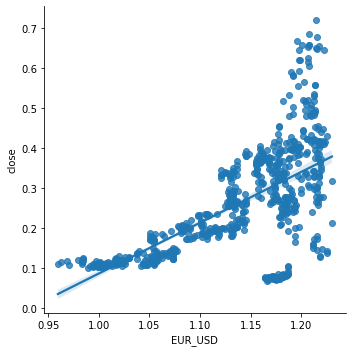

In [143]:
for i in ['month','day','weekday','day of week','SPY', 'VIX', '10Y Treasury', 'Gold', 'Oil','EUR_USD']:
    #df.plot(x=i,y='close',kind='scatter')
    print(df[['close',i]].corr(method = 'pearson'))
    plot = sns.lmplot(y='close',x=i,data=df) 

/tmp/ipykernel_677/1290072846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.DatetimeIndex(df['time_close']).year
/tmp/ipykernel_677/1290072846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_close'] = pd.to_datetime(df['time_close'])


<AxesSubplot:xlabel='time_close', ylabel='close'>

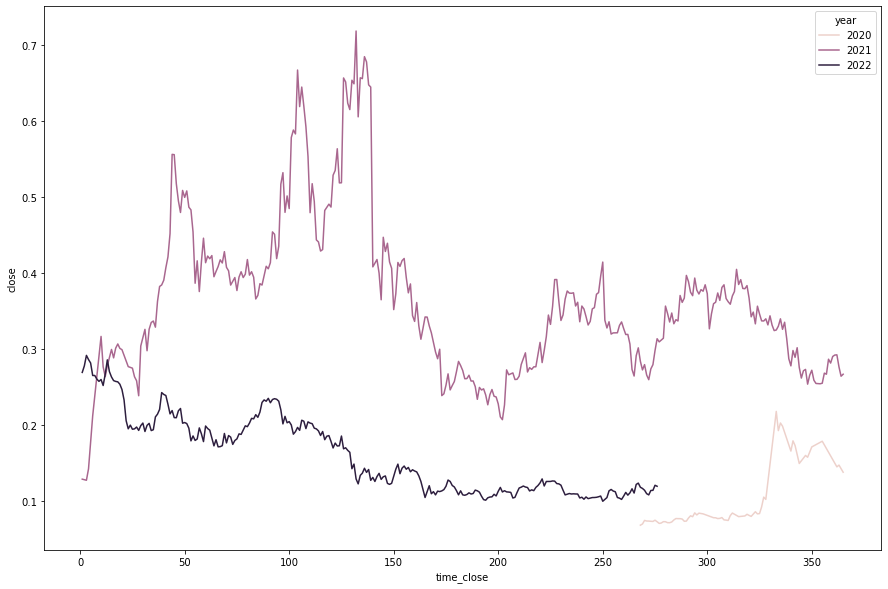

In [144]:
#check seasonality
plt.figure(figsize=(15, 10))
df['year'] = pd.DatetimeIndex(df['time_close']).year
df['time_close'] = pd.to_datetime(df['time_close'])
sns.lineplot(x=df['time_close'].dt.dayofyear, y=df['close'], hue=df['year']) #no special trends each year, close is low in mid year, high in the first half year?

In [159]:
df=df.drop(columns=['year'])

In [150]:
import statsmodels.api as sm

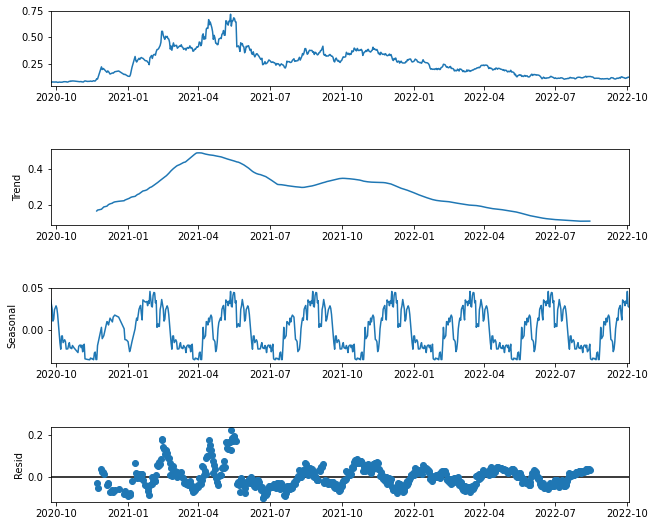

In [151]:
df_close = df[['time_close', 'close']].copy()
df_close = df_close.set_index('time_close')
df_close.head()

decomp = sm.tsa.seasonal_decompose(df_close, period=100)
fig = decomp.plot()
fig.set_size_inches(10, 8)

<AxesSubplot:>

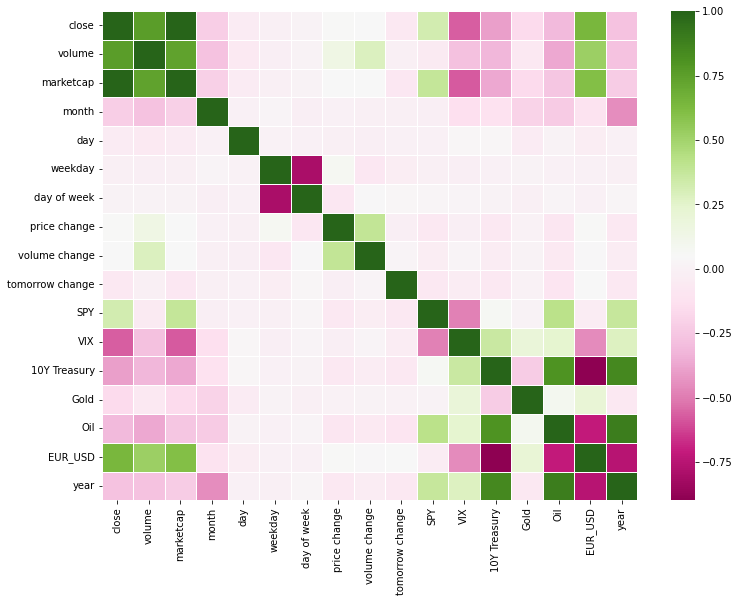

In [152]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,cmap="PiYG",linewidths=.5)

## check stationarity

In [153]:
from statsmodels.tsa.stattools import adfuller

#ADF statistic to check stationarity
for col in df.columns[2:]:
    timeseries = df[col]
    result = adfuller(timeseries)
    #plt.figure(figsize=(15, 10))
   # ax = timeseries.plot(secondary_y=False, logy=False)

    #print(f'Testing {col} from {timeseries.index[0]:%Y-%m-%d} to {timeseries.index[-1]:%Y-%m-%d} for Stationarity')
    print(f'ADF Statistic: {result[0]:.3f}')
    print(f'p-value: {result[1]:.3E}')
#     print('Critical Values:')
#     for key, value in result[4].items():
#         print('\t%s: %.3f' % (key, value))
    if result[0] > result[4]["5%"]:
        conclusion=f"Failed to Reject H_0 at 5% -> {col} Time Series is Non-Stationary"
    else:
        conclusion=f"Reject H_0 at at 5% -> {col} Time Series is Stationary"
    print(conclusion)
    print('\n')

ADF Statistic: -1.599
p-value: 4.841E-01
Failed to Reject H_0 at 5% -> close Time Series is Non-Stationary


ADF Statistic: -2.376
p-value: 1.487E-01
Failed to Reject H_0 at 5% -> volume Time Series is Non-Stationary


ADF Statistic: -1.711
p-value: 4.257E-01
Failed to Reject H_0 at 5% -> marketcap Time Series is Non-Stationary


ADF Statistic: -2.397
p-value: 1.426E-01
Failed to Reject H_0 at 5% -> month Time Series is Non-Stationary


ADF Statistic: -13.096
p-value: 1.752E-24
Reject H_0 at at 5% -> day Time Series is Stationary


ADF Statistic: -5.262
p-value: 6.555E-06
Reject H_0 at at 5% -> weekday Time Series is Stationary


ADF Statistic: -5.024
p-value: 1.992E-05
Reject H_0 at at 5% -> day of week Time Series is Stationary


ADF Statistic: -4.834
p-value: 4.689E-05
Reject H_0 at at 5% -> price change Time Series is Stationary


ADF Statistic: -15.695
p-value: 1.417E-28
Reject H_0 at at 5% -> volume change Time Series is Stationary


ADF Statistic: -4.838
p-value: 4.606E-05
Rejec

In [154]:
for i in ['SPY','VIX','Gold','Oil','EUR_USD','10Y Treasury']:
    df[i+'_ret']=df[i].pct_change()
df

/tmp/ipykernel_677/1480988381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i+'_ret']=df[i].pct_change()
/tmp/ipykernel_677/1480988381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i+'_ret']=df[i].pct_change()
/tmp/ipykernel_677/1480988381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,symbol_id,time_close,close,volume,marketcap,month,day,weekday,day of week,price change,...,Gold,Oil,EUR_USD,year,SPY_ret,VIX_ret,Gold_ret,Oil_ret,EUR_USD_ret,10Y Treasury_ret
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-24,XLM_512,2020-09-24,0.068613,1.257038e+08,1.422532e+09,9,24,3,1,-0.041776,...,1868.300049,40.310001,1.165854,2020,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-25,XLM_512,2020-09-25,0.070204,1.449687e+08,1.455307e+09,9,25,4,1,0.023188,...,1857.699951,40.250000,1.167324,2020,0.016167,-0.074711,-0.005674,-0.001488,0.001261,-0.010511
2020-09-26,XLM_512,2020-09-26,0.074894,1.755840e+08,1.552898e+09,9,26,5,0,0.066801,...,1857.699951,40.250000,1.167324,2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-09-27,XLM_512,2020-09-27,0.074085,1.236827e+08,1.536119e+09,9,27,6,0,-0.010805,...,1857.699951,40.250000,1.167324,2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-09-28,XLM_512,2020-09-28,0.074022,1.230299e+08,1.534811e+09,9,28,0,1,-0.000851,...,1872.800049,40.599998,1.163535,2020,0.016609,-0.007202,0.008128,0.008696,-0.003246,0.006070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,XLM_512,2022-09-29,0.108473,1.559084e+08,2.763125e+09,9,29,3,1,-0.014612,...,1658.500000,81.230003,0.970817,2022,-0.020889,0.055003,-0.001144,-0.011199,0.011669,0.011336
2022-09-30,XLM_512,2022-09-30,0.114305,2.215093e+08,2.912604e+09,9,30,4,1,0.053767,...,1662.400024,79.489998,0.982956,2022,-0.015464,-0.006910,0.002352,-0.021421,0.012503,0.015212
2022-10-01,XLM_512,2022-10-01,0.114461,1.889137e+08,2.916708e+09,10,1,5,0,0.001370,...,1662.400024,79.489998,0.982956,2022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [155]:
df.drop(df.groupby('symbol_id')['SPY_ret'].head(1).index, inplace=True) 
df

/tmp/ipykernel_677/3332301189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.groupby('symbol_id')['SPY_ret'].head(1).index, inplace=True)


,symbol_id,time_close,close,volume,marketcap,month,day,weekday,day of week,price change,...,Gold,Oil,EUR_USD,year,SPY_ret,VIX_ret,Gold_ret,Oil_ret,EUR_USD_ret,10Y Treasury_ret
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-25,XLM_512,2020-09-25,0.070204,1.449687e+08,1.455307e+09,9,25,4,1,0.023188,...,1857.699951,40.250000,1.167324,2020,0.016167,-0.074711,-0.005674,-0.001488,0.001261,-0.010511
2020-09-26,XLM_512,2020-09-26,0.074894,1.755840e+08,1.552898e+09,9,26,5,0,0.066801,...,1857.699951,40.250000,1.167324,2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-09-27,XLM_512,2020-09-27,0.074085,1.236827e+08,1.536119e+09,9,27,6,0,-0.010805,...,1857.699951,40.250000,1.167324,2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-09-28,XLM_512,2020-09-28,0.074022,1.230299e+08,1.534811e+09,9,28,0,1,-0.000851,...,1872.800049,40.599998,1.163535,2020,0.016609,-0.007202,0.008128,0.008696,-0.003246,0.006070
2020-09-29,XLM_512,2020-09-29,0.073736,1.372087e+08,1.528329e+09,9,29,1,1,-0.003863,...,1894.300049,39.290001,1.167883,2020,-0.005446,0.003055,0.011480,-0.032266,0.003737,-0.027149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,XLM_512,2022-09-29,0.108473,1.559084e+08,2.763125e+09,9,29,3,1,-0.014612,...,1658.500000,81.230003,0.970817,2022,-0.020889,0.055003,-0.001144,-0.011199,0.011669,0.011336
2022-09-30,XLM_512,2022-09-30,0.114305,2.215093e+08,2.912604e+09,9,30,4,1,0.053767,...,1662.400024,79.489998,0.982956,2022,-0.015464,-0.006910,0.002352,-0.021421,0.012503,0.015212
2022-10-01,XLM_512,2022-10-01,0.114461,1.889137e+08,2.916708e+09,10,1,5,0,0.001370,...,1662.400024,79.489998,0.982956,2022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [160]:
df.columns

Index(['tomorrow change', 'VIX', 'SPY_ret', 'Gold_ret', 'Oil_ret',
       'EUR_USD_ret', '10Y Treasury_ret'],
      dtype='object')

In [157]:
df=df.drop(columns=['symbol_id', 'time_close', 'close', 'volume', 'marketcap', 'month',
      'day', 'weekday', 'day of week', 'price change', 'volume change','SPY','10Y Treasury', 'Gold', 'Oil',
      'EUR_USD', 'VIX_ret'])


print(df)

train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
X_train,X_test = df.iloc[0:train_size+1,1:], df.iloc[train_size+1:len(df),1:]
y_train,y_test=df.iloc[0:train_size+1,0], df.iloc[train_size+1:len(df),0]
scaler=StandardScaler()
normalize_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
normalize_X_test=pd.DataFrame(scaler.fit_transform(X_test),columns= X_test.columns)

            tomorrow change        VIX  year   SPY_ret  Gold_ret   Oil_ret  \
time_close                                                                   
2020-09-25         0.066801  26.379999  2020  0.016167 -0.005674 -0.001488   
2020-09-26        -0.010805  26.379999  2020  0.000000  0.000000  0.000000   
2020-09-27        -0.000851  26.379999  2020  0.000000  0.000000  0.000000   
2020-09-28        -0.003863  26.190001  2020  0.016609  0.008128  0.008696   
2020-09-29        -0.002508  26.270000  2020 -0.005446  0.011480 -0.032266   
...                     ...        ...   ...       ...       ...       ...   
2022-09-29         0.053767  31.840000  2022 -0.020889 -0.001144 -0.011199   
2022-09-30         0.001370  31.620001  2022 -0.015464  0.002352 -0.021421   
2022-10-01         0.058336  31.620001  2022  0.000000  0.000000  0.000000   
2022-10-02        -0.010783  31.620001  2022  0.000000  0.000000  0.000000   
2022-10-03        -0.033347  31.620001  2022  0.000000  0.000000

In [158]:
X_train, X_test, y_train, y_test

(                  VIX  year   SPY_ret  Gold_ret   Oil_ret  EUR_USD_ret  \
 time_close                                                               
 2020-09-25  26.379999  2020  0.016167 -0.005674 -0.001488     0.001261   
 2020-09-26  26.379999  2020  0.000000  0.000000  0.000000     0.000000   
 2020-09-27  26.379999  2020  0.000000  0.000000  0.000000     0.000000   
 2020-09-28  26.190001  2020  0.016609  0.008128  0.008696    -0.003246   
 2020-09-29  26.270000  2020 -0.005446  0.011480 -0.032266     0.003737   
 ...               ...   ...       ...       ...       ...          ...   
 2022-05-14  28.870001  2022  0.000000  0.000000  0.000000     0.000000   
 2022-05-15  28.870001  2022  0.000000  0.000000  0.000000     0.000000   
 2022-05-16  27.469999  2022 -0.004058  0.003375  0.033578     0.002028   
 2022-05-17  26.100000  2022  0.020570  0.002592 -0.015762     0.003685   
 2022-05-18  30.959999  2022 -0.040312 -0.001265 -0.025000     0.010432   
 
             10Y Treasu

## linear regression: X is all stationary variable, y is tmr change

In [161]:
#X=df[['SPY', 'VIX', '10Y Treasury', 'Gold', 'Oil', 'EUR_USD']]
#y=df['tomorrow change']
#train_size = int(len(df) * 0.8)
#test_size = len(df) - train_size
#X_train,X_test = df.iloc[0:train_size, 12:18], df.iloc[train_size:len(df), 12:18]
#y_train,y_test=df.iloc[0:train_size, 11], df.iloc[train_size:len(df), 11]
#scaler=StandardScaler()
#normalize_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)*/


model=LinearRegression().fit(normalize_X_train, y_train)
y_pred=model.predict(normalize_X_test)

In [162]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred)) #not accurate

Coefficient of determination: 0.05


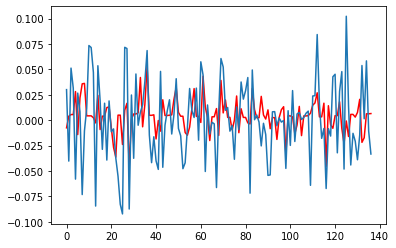

In [163]:
plt.plot(y_pred,color='red')#red is predicted value
plt.plot(list(y_test))#true value

##ols

In [164]:
#ols
df2=df.copy()
df2.columns = [c.replace(' ', '_') for c in df2.columns]
df2=df2.rename(columns = {'10Y_Treasury_ret':'Treasury10y_ret'})
reg_mul = smf.ols('tomorrow_change ~  SPY_ret+VIX+Treasury10y_ret+Gold_ret+Oil_ret+EUR_USD_ret', data = df2)
res_mul = reg_mul.fit()
print(res_mul.summary())

                            OLS Regression Results                            
Dep. Variable:        tomorrow_change   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     5.884
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           5.34e-06
Time:                        01:23:37   Log-Likelihood:                 820.92
No. Observations:                 688   AIC:                            -1628.
Df Residuals:                     681   BIC:                            -1596.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0014      0.013     

In [165]:
df_clean=df_clean.set_index('time_close')

In [166]:
#add LTC_2 and XRP_52
ltc=df_clean[df_clean['symbol_id']=='LTC_2']['close']
xrp=df_clean[df_clean['symbol_id']=='XRP_52']['close']
df3=df.copy()
df3['ltc']=ltc
df3['xrp']=xrp
df3.columns

Index(['tomorrow change', 'VIX', 'SPY_ret', 'Gold_ret', 'Oil_ret',
       'EUR_USD_ret', '10Y Treasury_ret', 'ltc', 'xrp'],
      dtype='object')

In [167]:
df3['ltc_ret']=df3['ltc'].pct_change()
df3['xrp_ret']=df3['xrp'].pct_change()
df3

,tomorrow change,VIX,SPY_ret,Gold_ret,Oil_ret,EUR_USD_ret,10Y Treasury_ret,ltc,xrp,ltc_ret,xrp_ret
time_close,,,,,,,,,,,
2020-09-25,0.066801,26.379999,0.016167,-0.005674,-0.001488,0.001261,-0.010511,44.790372,0.231864,NaN,NaN
2020-09-26,-0.010805,26.379999,0.000000,0.000000,0.000000,0.000000,0.000000,46.090238,0.243233,0.029021,0.049036
2020-09-27,-0.000851,26.379999,0.000000,0.000000,0.000000,0.000000,0.000000,46.340146,0.243122,0.005422,-0.000456
2020-09-28,-0.003863,26.190001,0.016609,0.008128,0.008696,-0.003246,0.006070,46.434781,0.244379,0.002042,0.005170
2020-09-29,-0.002508,26.270000,-0.005446,0.011480,-0.032266,0.003737,-0.027149,45.794669,0.242533,-0.013785,-0.007553
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,0.053767,31.840000,-0.020889,-0.001144,-0.011199,0.011669,0.011336,53.258766,0.447573,0.012806,0.004518
2022-09-30,0.001370,31.620001,-0.015464,0.002352,-0.021421,0.012503,0.015212,53.855640,0.480514,0.011207,0.073597
2022-10-01,0.058336,31.620001,0.000000,0.000000,0.000000,0.000000,0.000000,53.365201,0.475265,-0.009107,-0.010923


In [168]:
df3.drop(df3['ltc_ret'].head(1).index, inplace=True) 
df3=df3.drop(columns=['ltc','xrp'])
df3

,tomorrow change,VIX,SPY_ret,Gold_ret,Oil_ret,EUR_USD_ret,10Y Treasury_ret,ltc_ret,xrp_ret
time_close,,,,,,,,,
2020-09-26,-0.010805,26.379999,0.000000,0.000000,0.000000,0.000000,0.000000,0.029021,0.049036
2020-09-27,-0.000851,26.379999,0.000000,0.000000,0.000000,0.000000,0.000000,0.005422,-0.000456
2020-09-28,-0.003863,26.190001,0.016609,0.008128,0.008696,-0.003246,0.006070,0.002042,0.005170
2020-09-29,-0.002508,26.270000,-0.005446,0.011480,-0.032266,0.003737,-0.027149,-0.013785,-0.007553
2020-09-30,0.022203,26.370001,0.007582,-0.003590,0.023670,0.005413,0.049612,-0.004501,-0.002013
...,...,...,...,...,...,...,...,...,...
2022-09-29,0.053767,31.840000,-0.020889,-0.001144,-0.011199,0.011669,0.011336,0.012806,0.004518
2022-09-30,0.001370,31.620001,-0.015464,0.002352,-0.021421,0.012503,0.015212,0.011207,0.073597
2022-10-01,0.058336,31.620001,0.000000,0.000000,0.000000,0.000000,0.000000,-0.009107,-0.010923


In [169]:
train_size = int(len(df3) * 0.8)
test_size = len(df3) - train_size
X_train,X_test = df3.iloc[0:train_size+1,1:], df3.iloc[train_size+1:len(df3),1:]
y_train,y_test=df3.iloc[0:train_size+1,0], df3.iloc[train_size+1:len(df3),0]
scaler=StandardScaler()
normalize_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
normalize_X_test=pd.DataFrame(scaler.fit_transform(X_test),columns= X_test.columns)

#X_train,X_test = df3.iloc[0:train_size, 12:20], df3.iloc[train_size:len(df3), 12:20]
#y_train,y_test=df3.iloc[0:train_size, 11], df3.iloc[train_size:len(df3), 11]
#normalize_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

model2=LinearRegression().fit(normalize_X_train, y_train)
y_pred=model2.predict(normalize_X_test)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred)) #not accurate

Coefficient of determination: 0.03


In [170]:
#ols
df4=df3.copy()
df4.columns = [c.replace(' ', '_') for c in df4.columns]
df4=df4.rename(columns = {'10Y_Treasury_ret':'Treasury10y_ret'})
reg_mul2 = smf.ols('tomorrow_change ~  SPY_ret+VIX+Treasury10y_ret+Gold_ret+Oil_ret+EUR_USD_ret+ltc_ret+xrp_ret', data = df4)
res_mul2 = reg_mul2.fit()
print(res_mul2.summary()) #accuracy increases

                            OLS Regression Results                            
Dep. Variable:        tomorrow_change   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     4.820
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           8.66e-06
Time:                        01:24:09   Log-Likelihood:                 821.22
No. Observations:                 687   AIC:                            -1624.
Df Residuals:                     678   BIC:                            -1584.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0029      0.013     

In [32]:
#change label to close
#reg_mul3 = smf.ols('close ~  SPY+VIX+Treasury10y+Gold+Oil+EUR_USD+ltc+xrp', data = df4)
#res_mul3 = reg_mul3.fit()
#print(res_mul3.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1674.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:48:59   Log-Likelihood:                 1438.0
No. Observations:                 689   AIC:                            -2858.
Df Residuals:                     680   BIC:                            -2817.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3864      0.087     -4.467      

In [131]:
#X=df3[['SPY', 'VIX', '10Y Treasury', 'Gold', 'Oil', 'EUR_USD','ltc','xrp']]
#y=df3[['tomorrow change']]
#tss = TimeSeriesSplit(n_splits = 2)
#for train_index, test_index in tss.split(X):
#    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
#    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#normalize_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
#model8=LinearRegression().fit(normalize_X_train, y_train)
#normalize_X_test=pd.DataFrame(scaler.fit_transform(X_test),columns= X_test.columns)
#y_pred=model8.predict(normalize_X_test)
#print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

In [171]:
df3.columns

Index(['tomorrow change', 'VIX', 'SPY_ret', 'Gold_ret', 'Oil_ret',
       'EUR_USD_ret', '10Y Treasury_ret', 'ltc_ret', 'xrp_ret'],
      dtype='object')

## logistic regression X is index return, y is binary response of tmr return

In [172]:
from sklearn.linear_model import LogisticRegression

In [ ]:
df3.loc[df3['tomorrow change'] < 0, 'target'] = 0
df3.loc[df3['tomorrow change'] > 0, 'target'] = 1
df3


,tomorrow change,VIX,SPY_ret,Gold_ret,Oil_ret,EUR_USD_ret,10Y Treasury_ret,ltc_ret,xrp_ret,target
time_close,,,,,,,,,,
2020-09-26,-0.010805,26.379999,0.000000,0.000000,0.000000,0.000000,0.000000,0.029021,0.049036,0.0
2020-09-27,-0.000851,26.379999,0.000000,0.000000,0.000000,0.000000,0.000000,0.005422,-0.000456,0.0
2020-09-28,-0.003863,26.190001,0.016609,0.008128,0.008696,-0.003246,0.006070,0.002042,0.005170,0.0
2020-09-29,-0.002508,26.270000,-0.005446,0.011480,-0.032266,0.003737,-0.027149,-0.013785,-0.007553,0.0
2020-09-30,0.022203,26.370001,0.007582,-0.003590,0.023670,0.005413,0.049612,-0.004501,-0.002013,1.0
...,...,...,...,...,...,...,...,...,...,...
2022-09-29,0.053767,31.840000,-0.020889,-0.001144,-0.011199,0.011669,0.011336,0.012806,0.004518,1.0
2022-09-30,0.001370,31.620001,-0.015464,0.002352,-0.021421,0.012503,0.015212,0.011207,0.073597,1.0
2022-10-01,0.058336,31.620001,0.000000,0.000000,0.000000,0.000000,0.000000,-0.009107,-0.010923,1.0


## use decision tree on data

In [181]:
#make tomorrow change a binary response
#df3['target']=np.sign(df3['tomorrow change'])
#df3=df3.drop(columns=['year'])
#X3=df5.iloc[:,12:20]
#tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
from sklearn.metrics import accuracy_score

X_train,X_test = df3.iloc[0:train_size+1,1:8], df3.iloc[train_size+1:len(df3),1:8]
y_train,y_test=df3.iloc[0:train_size+1,9], df3.iloc[train_size+1:len(df3),9]

#model3=tree_clf.fit(X_train3, y_train3)

model3=LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred=model3.predict(X_test)
#print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred)) 
#confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[63  4]
 [65  5]]


0.49635036496350365

## change y to 4 categories: (decision tree)

In [176]:
print(df['tomorrow change'].quantile([0.25,0.50,0.75]))
Q3 = df['tomorrow change'].quantile(0.75)
Q1 = df['tomorrow change'].quantile(0.25)
Q2 = df['tomorrow change'].quantile(0.50)

0.25   -0.031408
0.50   -0.000511
0.75    0.029424
Name: tomorrow change, dtype: float64


In [182]:
#divide into 4 categories
df3.loc[df3['tomorrow change'] < Q1, 'target2'] = 0
df3.loc[(df3['tomorrow change'] >= Q1)&(df3['tomorrow change'] < Q2), 'target2'] = 1
df3.loc[(df3['tomorrow change'] >= Q2)&(df3['tomorrow change'] < Q3), 'target2'] = 2
df3.loc[df3['tomorrow change'] >= Q3, 'target2'] = 3
df3

,tomorrow change,VIX,SPY_ret,Gold_ret,Oil_ret,EUR_USD_ret,10Y Treasury_ret,ltc_ret,xrp_ret,target,target2
time_close,,,,,,,,,,,
2020-09-26,-0.010805,26.379999,0.000000,0.000000,0.000000,0.000000,0.000000,0.029021,0.049036,0.0,1.0
2020-09-27,-0.000851,26.379999,0.000000,0.000000,0.000000,0.000000,0.000000,0.005422,-0.000456,0.0,1.0
2020-09-28,-0.003863,26.190001,0.016609,0.008128,0.008696,-0.003246,0.006070,0.002042,0.005170,0.0,1.0
2020-09-29,-0.002508,26.270000,-0.005446,0.011480,-0.032266,0.003737,-0.027149,-0.013785,-0.007553,0.0,1.0
2020-09-30,0.022203,26.370001,0.007582,-0.003590,0.023670,0.005413,0.049612,-0.004501,-0.002013,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,0.053767,31.840000,-0.020889,-0.001144,-0.011199,0.011669,0.011336,0.012806,0.004518,1.0,3.0
2022-09-30,0.001370,31.620001,-0.015464,0.002352,-0.021421,0.012503,0.015212,0.011207,0.073597,1.0,2.0
2022-10-01,0.058336,31.620001,0.000000,0.000000,0.000000,0.000000,0.000000,-0.009107,-0.010923,1.0,3.0


In [178]:
from sklearn.metrics import classification_report

In [183]:
X_train,X_test = df3.iloc[0:train_size+1,1:8], df3.iloc[train_size+1:len(df3),1:8]
y_train,y_test=df3.iloc[0:train_size+1,10], df3.iloc[train_size+1:len(df3),10]

tree_clf = DecisionTreeClassifier(max_depth=100, random_state=42)

model4=tree_clf.fit(X_train, y_train)

y_pred=model4.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[11 10  4  6]
 [ 7 14 11  3]
 [ 8  9 14 10]
 [ 9 10  7  4]]
              precision    recall  f1-score   support

         0.0       0.31      0.35      0.33        31
         1.0       0.33      0.40      0.36        35
         2.0       0.39      0.34      0.36        41
         3.0       0.17      0.13      0.15        30

    accuracy                           0.31       137
   macro avg       0.30      0.31      0.30       137
weighted avg       0.31      0.31      0.31       137



0.31386861313868614

## LASSO to predict tmr_ret

In [201]:
#lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_auc_score
from sklearn.kernel_ridge import KernelRidge
import math
from sklearn.metrics import mean_squared_error

In [202]:
model5 = Lasso(alpha=0.001)

X_train,X_test = df3.iloc[0:train_size+1,1:8], df3.iloc[train_size+1:len(df3),1:8]
y_train,y_test=df3.iloc[0:train_size+1,0], df3.iloc[train_size+1:len(df3),0]
scaler=StandardScaler()
#normalize_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
#normalize_X_test=pd.DataFrame(scaler.fit_transform(X_test),columns= X_test.columns)

model5.fit(normalize_X_train, y_train)
y_pred=model5.predict(normalize_X_test)
#print(model5.score(normalize_X_test, y_test), model5.score(normalize_X_train, y_train))

print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test, y_pred))
#poor performance


0.0374736604061898
0.06402226735041816


0.14181562884565896
-12.404835021570955


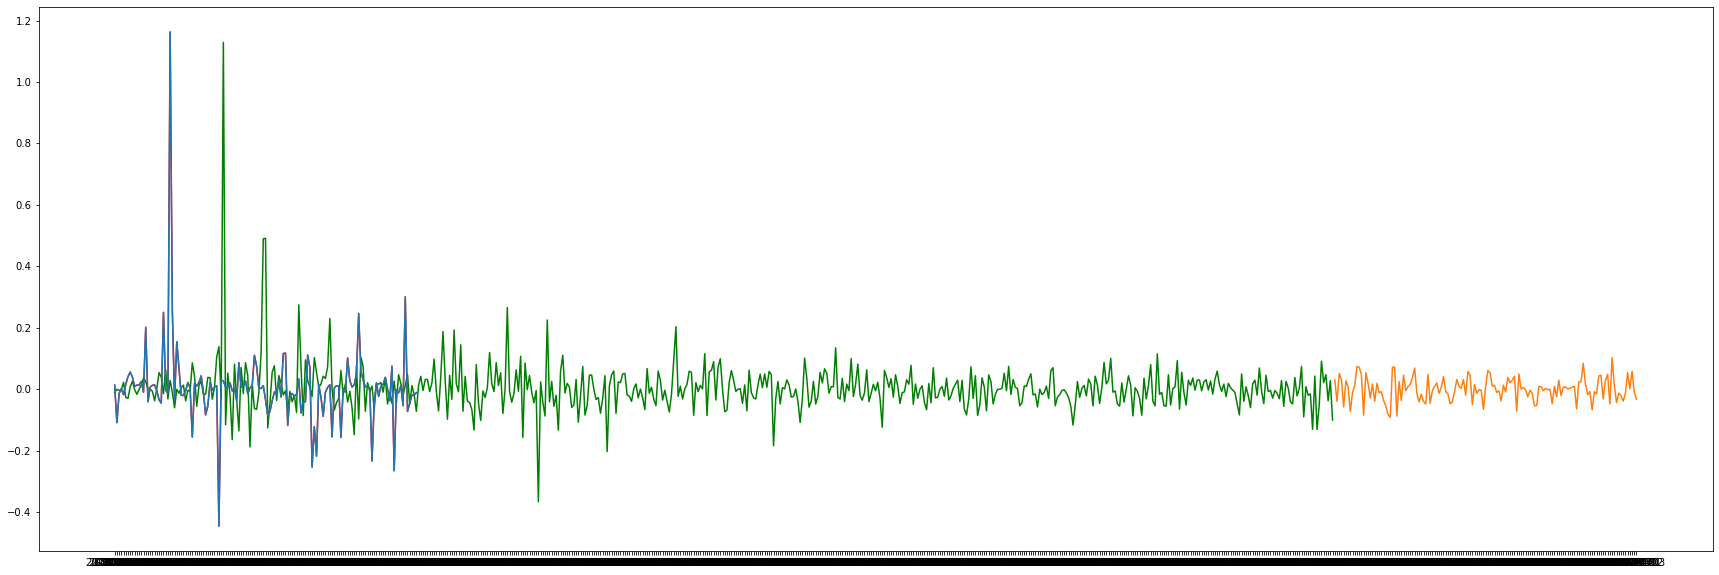

In [206]:
model6 = KernelRidge(kernel='polynomial',alpha=0.05)
model6.fit(normalize_X_train, y_train)
#print(model6.score(normalize_X_train, y_train))
y_pred = model6.predict(normalize_X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test, y_pred))

fig, ax = plt.subplots(figsize = [30,10])
ax.plot(y_pred,color='red')
ax.plot(y_train,color='green')
ax.plot(model6.predict(normalize_X_test))
ax.plot(y_test)
plt.show()

## SVM

In [209]:
from sklearn import svm
model7 = svm.SVR(kernel = 'poly')
model7.fit(normalize_X_train,y_train)
model7.score(normalize_X_train,y_train)
y_pred = model7.predict(normalize_X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test, y_pred))

0.0787422512464611
-3.1326529654541444


## generalized linear regression

In [210]:
import statsmodels.formula.api as smf

In [226]:
df6=df3.copy()
df6.columns = [c.replace(' ', '_') for c in df6.columns]
df6=df6.rename(columns = {'10Y_Treasury_ret':'Treasury10y_ret'})

model8 = smf.glm(formula='target2 ~ SPY_ret+VIX+Treasury10y_ret+Gold_ret+Oil_ret+EUR_USD_ret+ltc_ret+xrp_ret', data = df6,family=sm.families.Binomial())
results = model8.fit()

print(results.summary())
#results.predict(y_

                 Generalized Linear Model Regression Results                  
Dep. Variable:                target2   No. Observations:                  687
Model:                            GLM   Df Residuals:                      678
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 12 Nov 2022   Deviance:                       54222.
Time:                        02:59:50   Pearson chi2:                 4.63e+18
No. Iterations:                    74   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.713e+17    1.2e+07   1.

/opt/conda/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/conda/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/opt/conda/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1015: RuntimeWarning: invalid value encountered in log
  n * np.log(1 - mu + 1e-20)) * var_weights
/opt/conda/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/opt/conda/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
